# 1. Business Understanding

### 1.1 Business Objectives

#### Background 
WWW is a 7-year-old enterprise that seeks out small, unique wineries aorund the world and brings their wines to its customers. WWW sells wines through catalogs and a web site, and ten small stores in major cities around the USA. Customers can purchase wines at their stores, via phone or on the website. Currently they ahve 350.000 customers, which most of them are highly involved in wine. Besides wine WWW also sells wine accessories like wine racks and cork extractors.


#### Business objectives
Currently every customer gets every 6 weeks a catolog send and there are no loyalty programs or attempts to identify target markets for cross-selling opportunities. 
WWW wants to use the database that they started 4 years ago. With this database they want to move from mass-marketing to targeted marketing.


#### Business Success criteria

WWW wants to "get smart" and start differentiating customers, and developing more focused programs.

### 1.2 Assess situation

WWW has provided a sample of 10,000 customers from its active database. These are all customers who have purchased something from WWW in the past 18 months (after 18 months with no purchase, a person is eliminated from the active database).


### 1.3 Data Mining Goals

#### Data mining goals
Segment the database and find the relevant clusters of customers. To do this we need 2 different segmentations: 
1. based on engagement (or value of the customer)
2. based on the buying behavior (or what are the types of wines they tend to buy).

#### Data mining Success Criteria
Provide a concatenated view of the segmentation results.

### 1.4 Produce Project Plan

#### Project plan
1. understand the data
2. Data preparation 
3. Modeling 
4. Evaluation
5. Deployment

Initial Assessment of Tools, and Techniques


# 2. Data understanding

- Initial Data Collection report
- Data Description Report
- Data Exploration Report
- Data Quality Report



#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt
from math import ceil
import plotly.figure_factory as ff
import matplotlib.cm as cm
import warnings

from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')

#### Functions

In [2]:
#Function that returns a dataframe for each of the multivariable lists
def variable_dataframe_creator(list):

    polyvar_df = {}

    for variable_index in range(len(list)):
        polyvar_df["var_" + str(variable_index)] = list[variable_index]

    return pd.DataFrame(polyvar_df, index = [0])

#KMeans for each pair of variables
def elbow_grapher (dataframe, row):
    """Creates an elbow graph for a given set of variables.

    Args:
        dataframe (list): list which indicates selection from greater dataframe from which to fetch the pairs of variables.
        row (int): row index of variable. 
    """
    wcss=[]
    for n_clusters in range_n_clusters_k_means:
        kmeans=KMeans(init='k-means++', n_init=15, random_state=42, n_clusters=n_clusters)
        kmeans.fit(df[dataframe.iloc[row].tolist()])
        wcss.append(kmeans.inertia_)
        #inertia = Sum of squared distances of samples to their closest cluster center.
    plt.plot(range_n_clusters_k_means, wcss, color='green')
    plt.title('Elbow Graph for: ' + str(dataframe.iloc[row].tolist()))
    plt.xlabel('Number of clusters K')
    plt.ylabel('WCSS')
    plt.show()

def k_chosen_func():
    return int(input("Best K:"))

def kmean_creator(dataframe, row,list_name = None, poly = False):
    """Calls the elbow_grapher and silhouette_scorer functions and requests user to input best K based on information presented from Elbow Plot and Silhouette Scores.

    dataframe (list): list which indicates selection from greater dataframe from which to fetch the pairs of variables.
    row (int): row index of variable pair. 
    """

    #Printing out which pair of variables we're working with
    print("********************************************************************************")
    print(str(dataframe.iloc[row].tolist()))
    print("********************************************************************************")

    #Storing original dataframe columns
    original_column_headers = df_clean_scaled.columns

    #Creating a temporary df based on those variables only
    temp_df = df_clean_scaled[dataframe.iloc[row]]

    #Invoking elbow_grapher and silhouette_scorer functions
    elbow_grapher(dataframe,row)

    #Plotting dendogram for multivariate clusters
    #if poly == True:
        #dendogram_creator(dataframe,row)
    
    #Storing number of Ks to user as per user input as a variable
    k_chosen = k_chosen_func()
    print("------------")
    print(f"K Chosen: {k_chosen}")
    print("------------")

    #KMeans clustering the data based on that number of K
    kmclust = KMeans(k_chosen, init='k-means++', n_init=15, random_state=42)
    temp_df['KCluster'] = kmclust.fit_predict(df_clean_scaled[dataframe.iloc[row].tolist()])
    
    if poly == False:

        #Storing that data as a dataframe both grouped by cluster and notgrouped by cluster in two separate dictionaries
        cluster_dfs[str(dataframe.iloc[row][0]) + ":" + str(dataframe.iloc[row][1])] = temp_df
        cluster_dfs_grouped[str(dataframe.iloc[row][0]) + ":" + str(dataframe.iloc[row][1])] = temp_df.groupby("KCluster").mean()

        #Plotting histograms
        cluster_dfs[str(dataframe.iloc[row][0]) + ":" + str(dataframe.iloc[row][1])].groupby("KCluster").hist(column = cluster_dfs[str(dataframe.iloc[row][0]) + ":" + str(dataframe.iloc[row][1])].columns.tolist()[0:len(dataframe.columns)])
        plt.show()

    else:

        #Storing that data as a dataframe both grouped by cluster and notgrouped by cluster in two separate dictionaries
        cluster_dfs[list_name] = temp_df
        cluster_dfs_grouped[list_name] = temp_df.groupby("KCluster").mean()

        #Plotting histograms
        cluster_dfs[list_name].groupby("KCluster").hist(figsize = (20,9), column = cluster_dfs[list_name].columns.tolist()[0:len(dataframe.columns)])
        plt.show()

def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        
        
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)



def Hierarchical_Clustering_method(df):
    ### step 1 is producing a plot with different methods so you can chose the best method for the model
    # Prepare input
    hc_methods = ["ward", "complete", "average", "single"]
    # Call function defined above to obtain the R2 statistic for each hc_method
    max_nclus = 10
    r2_hc_methods = np.vstack(
        [
            get_r2_hc(df=df, link_method=link, max_nclus=max_nclus) 
            for link in hc_methods
        ]
    ).T
    r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

    sns.set()
    # Plot data
    fig = plt.figure(figsize=(11,5))
    sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

    # Finalize the plot
    fig.suptitle("R2 plot for various hierarchical methods df_behaviour", fontsize=21)
    plt.gca().invert_xaxis()  # invert x axis
    plt.legend(title="HC methods", title_fontsize=11)
    plt.xticks(range(1, max_nclus + 1))
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R2 metric", fontsize=13)

    plt.show()
    


def hc_dendrogram(df, linkage_method, distance):
    ### step 2 producing the dendrogram to decide how many clusters is best
    
    # setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
    hclust = AgglomerativeClustering(linkage=linkage_method, affinity=distance, distance_threshold=0, n_clusters=None)
    hclust.fit_predict(df)
    # create the counts of samples under each node (number of points being merged)
    counts = np.zeros(hclust.children_.shape[0])
    n_samples = len(hclust.labels_)

    # hclust.children_ contains the observation ids that are being merged together
    # At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
    for i, merge in enumerate(hclust.children_):
        # track the number of observations in the current cluster being formed
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                # If this is True, then we are merging an observation
                current_count += 1  # leaf node
            else:
                # Otherwise, we are merging a previously formed cluster
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
    # the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
    # the counts indicate the number of points being merged (dendrogram's x-axis)
    linkage_matrix = np.column_stack(
        [hclust.children_, hclust.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sns.set()
    fig = plt.figure(figsize=(11,5))
    # The Dendrogram parameters need to be tuned
    y_threshold = 125
    dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
    plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
    plt.title(f'Hierarchical Clustering - {linkage_method.title()}\'s Dendrogram', fontsize=21)
    plt.xlabel('Number of points in node (or index of point if no parenthesis)')
    plt.ylabel(f'{distance.title()} Distance', fontsize=13)
    plt.show()       

def unscaler(list_name,list_used):

    df_clean_reverted = pd.DataFrame(scaler.inverse_transform(df_clean_scaled),columns = original_column_headers)
    unscaled_dfs_grouped[list_name] = (df_clean_reverted[list_used].join(cluster_dfs[list_name]["KCluster"]))
    return unscaled_dfs_grouped[list_name]

def silhouette_scorer(dataframe, range_clusters = np.arange(2,7,1)):

    # Storing average silhouette metric
    avg_silhouette = []
    for nclus in range_clusters:
        # Skip nclus == 1
        if nclus == 1:
            continue
        
        # Create a figure
        fig = plt.figure(figsize=(13, 7))

        # Initialize the KMeans object with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
        cluster_labels = kmclust.fit_predict(dataframe)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(dataframe, cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(dataframe, cluster_labels)

        y_lower = 10
        for i in range(nclus):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            # Filling the silhouette
            color = cm.nipy_spectral(float(i) / nclus)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        
        # The silhouette coefficient can range from -1, 1
        xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
        plt.xlim([xmin, xmax])
    
        # The (nclus+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(dataframe) + (nclus + 1) * 10])

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks(np.arange(xmin, xmax, 0.1))

def radar_grapher(dataframe):
    fig = go.Figure()
    
    for cluster in range(len(dataframe)):
        
        categories = list(dataframe)

        master_values = list()
        master_values.append(dataframe.iloc[cluster,:].values.tolist())

        fig.add_trace(go.Scatterpolar(
              r=dataframe.iloc[cluster,:].values.tolist(),
              theta=categories,
              fill='toself',
              name='Cluster ' + str(cluster)
        ))
        
    fig.update_layout(
    polar=dict(
      radialaxis=dict(
        visible=True,
        range=[min(master_values), max(master_values)]))
      )
    
    fig.show()

def cluster_merger(dataframe_1,dataframe_2,cluster_column_name_1 = "KCluster", cluster_column_name_2 = "tsne_clusters"):
    clusters_from_1 = dataframe_1.iloc[:,-1]
    clusters_from_2 = dataframe_2.iloc[:,-1]
    df_clustered_final = df_clean.join([clusters_from_1,clusters_from_2])
    df_clustered_final.rename(columns ={str(cluster_column_name_1):"behaviour_cluster",str(cluster_column_name_2):"engagement_cluster"}, inplace=True)
    return df_clustered_final

#### Download Data 

In [6]:
df = pd.read_excel ("WonderfulWinesoftheWorld.xlsx")

#### Data exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Freq         10001 non-null  float64
 6   Recency      10001 non-null  float64
 7   Monetary     10001 non-null  float64
 8   LTV          10001 non-null  float64
 9   Perdeal      10001 non-null  float64
 10  Dryred       10001 non-null  float64
 11  Sweetred     10001 non-null  float64
 12  Drywh        10001 non-null  float64
 13  Sweetwh      10001 non-null  float64
 14  Dessert      10001 non-null  float64
 15  Exotic       10001 non-null  float64
 16  WebPurchase  10001 non-null  float64
 17  WebVisit     10001 non-null  float64
dtypes: float64(18)
memory usage: 1.4 MB


In [8]:
df.head()

Custid  Dayswus   Age   Edu    Income  Freq  Recency  Monetary    LTV  \
0  5325.0    653.0  55.0  20.0   78473.0  20.0     18.0     826.0  445.0   
1  3956.0   1041.0  75.0  18.0  105087.0  36.0     33.0    1852.0  539.0   
2  3681.0    666.0  18.0  12.0   27984.0   4.0     56.0      39.0   -7.0   
3  2829.0   1049.0  42.0  16.0   61748.0   2.0     46.0      37.0   -6.0   
4  8788.0    837.0  47.0  16.0   65789.0   2.0      3.0      36.0    4.0   

   Perdeal  Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  WebPurchase  \
0      7.0    67.0       4.0   26.0      2.0      1.0     1.0         36.0   
1      2.0    49.0       0.0   46.0      1.0      3.0     0.0         20.0   
2     88.0     4.0      29.0   14.0     32.0     21.0    48.0         60.0   
3     70.0    86.0       1.0   11.0      1.0      1.0    55.0         59.0   
4     35.0    85.0       0.0   12.0      2.0      1.0    28.0         63.0   

   WebVisit  
0       5.0  
1       4.0  
2       8.0  
3       7.0  
4       6.0

In [9]:
# summary statistics for all variables
df.describe(include="all").transpose()

count        mean           std      min       25%      50%  \
Custid       10000.0   6000.5000   2886.895680   1001.0   3500.75   6000.5   
Dayswus      10001.0    898.1020    202.482664    550.0    724.00    894.0   
Age          10001.0     47.9273     17.301856     18.0     33.00     48.0   
Edu          10001.0     16.7391      1.876281     12.0     15.00     17.0   
Income       10001.0  69904.3580  27610.852665  10000.0  47646.00  70009.0   
Freq         10001.0     14.6281     11.968475      1.0      4.00     12.0   
Recency      10001.0     62.4068     69.870762      0.0     26.00     52.0   
Monetary     10001.0    622.5552    647.102966      6.0     63.00    383.0   
LTV          10001.0    209.0712    291.971441   -178.0     -2.00     57.0   
Perdeal      10001.0     32.3972     27.895699      0.0      6.00     25.0   
Dryred       10001.0     50.3827     23.452643      1.0     32.00     51.0   
Sweetred     10001.0      7.0545      7.866151      0.0      2.00      4.0   
Drywh        10001.0     28.5213     12.583328      1.0     19.00     28.0   
Sweetwh      10001.0      7.0698      8.014682      0.0      2.00      4.0   
Dessert      10001.0      6.9474      7.879152      0.0      2.00      4.0   
Exotic       10001.0     16.5466     17.246809      0.0      4.00     10.0   
WebPurchase  10001.0     42.3762     18.521136      4.0     28.00     45.0   
WebVisit     10001.0      5.2166      2.330340      0.0      3.00      6.0   

                  75%       max  
Custid        8500.25   11000.0  
Dayswus       1074.00    1250.0  
Age             63.00      78.0  
Edu             18.00      20.0  
Income       92147.00  140628.0  
Freq            24.00      56.0  
Recency         78.00     549.0  
Monetary      1077.00    3052.0  
LTV            364.00    1791.0  
Perdeal         56.00      97.0  
Dryred          69.00      99.0  
Sweetred        10.00      75.0  
Drywh           37.00      74.0  
Sweetwh         10.00      62.0  
Dessert          9.00      77.0  
Exotic          23.00      96.0  
WebPurchase     57.00      88.0  
WebVisit         7.00      10.0

In [10]:
# check missing values
df.isnull().sum()

Custid         1
Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [11]:
# check for duplicated observations
df.loc[df.duplicated(keep=False), :]

Empty DataFrame
Columns: [Custid, Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit]
Index: []

- The dataset has 10.000 rows and has 18 features
- The datatypes are all in float64, which for some features characteristics do not make sense, but for the modeling it doesn't effect the outcomes so we won't change it.
- We do not have any categorical features ## is this true? could we say that the percentage of type of wine bought is a categorical feature?
- There is one missing value for CustomID. 
- Looking to the describe function we do not see any extraordinary values (which was expected as this is said by the professor)


Low caridnality / non-metric features

#### Feature explanation
![Feature_description](Feature_description.png)

#### visualistion of the distribution and frequency of features

In [12]:
list(df.columns)

['Custid',
 'Dayswus',
 'Age',
 'Edu',
 'Income',
 'Freq',
 'Recency',
 'Monetary',
 'LTV',
 'Perdeal',
 'Dryred',
 'Sweetred',
 'Drywh',
 'Sweetwh',
 'Dessert',
 'Exotic',
 'WebPurchase',
 'WebVisit']

In [13]:
non_metric_features = ['Age','Edu','Income','Freq','','','']

# define metric and low cardinality / non-metric features
## Looks like almost all features are metric  

# drop Custid
metric_features = df.columns.drop(['Custid']).to_list()

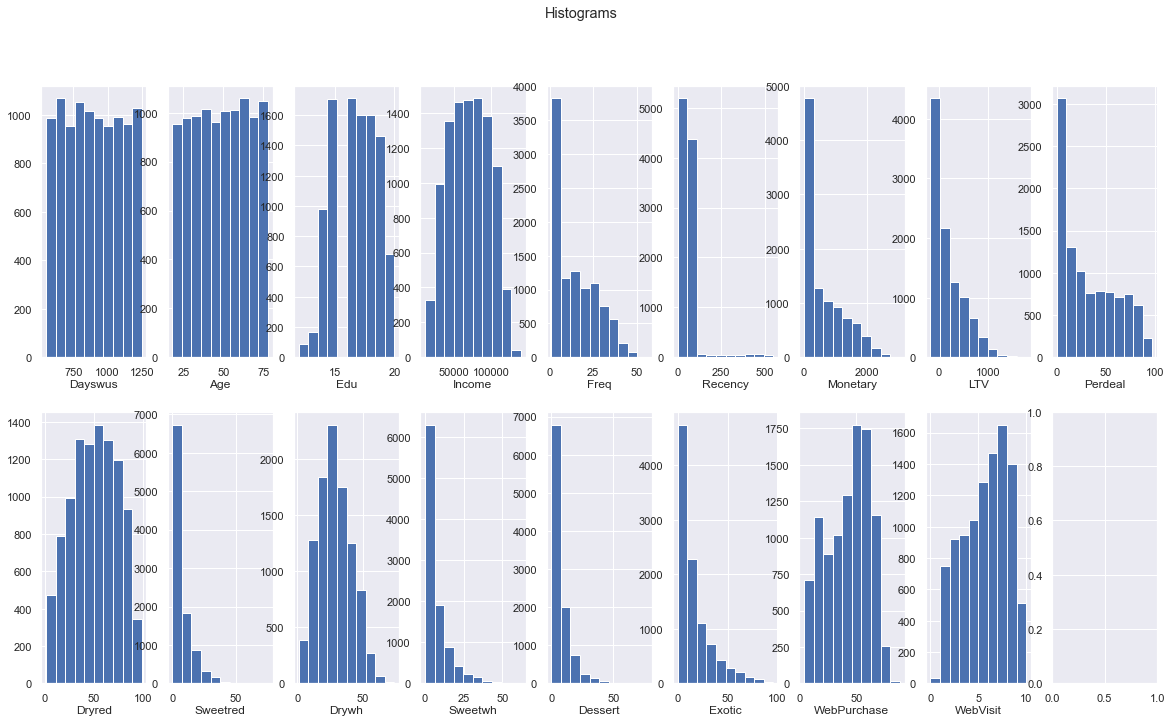

In [24]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Histograms"

plt.suptitle(title)

plt.show()

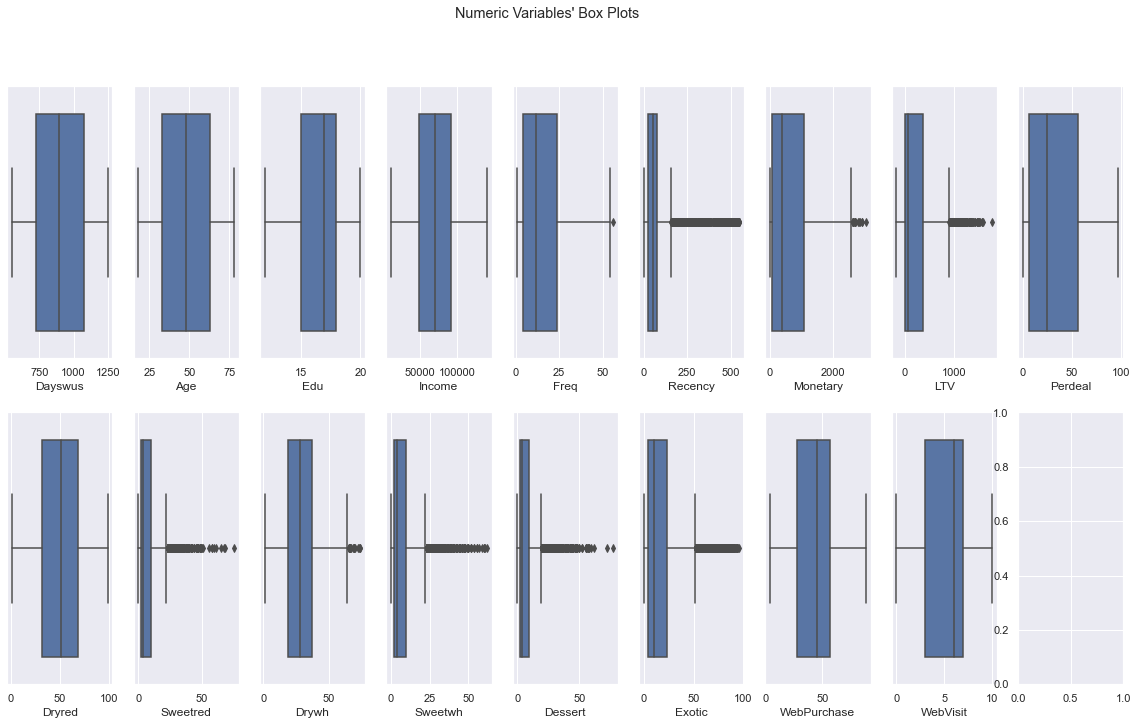

In [26]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()


# 3. Data preparation

In [16]:
df_clean = df.copy()

In [17]:
# find the row with the missing value
df_clean[df['Custid'].isna() == True]

Custid  Dayswus      Age      Edu     Income     Freq  Recency  \
10000     NaN  898.102  47.9273  16.7391  69904.358  14.6281  62.4068   

       Monetary       LTV  Perdeal   Dryred  Sweetred    Drywh  Sweetwh  \
10000  622.5552  209.0712  32.3972  50.3827    7.0545  28.5213   7.0698   

       Dessert   Exotic  WebPurchase  WebVisit  
10000   6.9474  16.5466      42.3762    5.2166

In [18]:
# looking to the values from the row with the missing Custid we see that the values in this row are exactly the mean
# This indicates that this row is not meant to be in the dataframe and therefor we drop it.

df_clean.drop([10000], inplace = True)

In [19]:
from sklearn.preprocessing import StandardScaler

original_column_headers = df_clean.columns
scaler = StandardScaler()
df_clean_scaled_array = scaler.fit_transform(df_clean)

#transforming back into df from array
df_clean_scaled = pd.DataFrame(df_clean_scaled_array, columns = original_column_headers)
df_clean_scaled.sample(3)

Custid   Dayswus       Age       Edu    Income      Freq   Recency  \
9948  1.572529 -1.699415  1.506931  0.672021  1.941072  1.284366 -0.163256   
7545 -0.228111  1.555185  0.813364 -0.393917  0.275712  1.284366 -0.063071   
5632  0.748766 -1.353706  0.524377  0.139052 -0.203592 -0.720902 -0.277753   

      Monetary       LTV   Perdeal    Dryred  Sweetred     Drywh   Sweetwh  \
9948  1.303417  1.743077 -1.125521  1.007021 -0.769690 -0.995071 -0.258251   
7545  1.320416  0.725855 -0.838739 -0.314792 -0.134055  0.673804  0.240833   
5632 -0.733353 -0.654417  0.129153 -0.442709 -0.769690  1.468507 -0.133480   

       Dessert    Exotic  WebPurchase  WebVisit  
9948 -0.374076 -0.901419    -1.640083 -1.809436  
7545 -0.120241 -0.611510    -0.830197  0.765296  
5632 -0.120241 -0.611510    -0.290274 -0.522070

### Feature Selection 

Since we wanna make two segmentations we will have to chose different features for the different 

In [20]:
#Looking at the correlation between variables to avoid using highly correlated variables in the same segmentation clustering

corr = df_clean_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')



In [21]:
corr_preferences = corr.loc["Perdeal":"WebPurchase","Perdeal":"WebPurchase"]
corr_preferences.style.background_gradient(cmap='coolwarm')

In [22]:
#Creating possible feature sets

#Maybe we could try and run our different segmentation techniques using all of the features that pertain to preferences to set a baseline
full_preference = list(corr_preferences)

#We will also try removing the deal feature from the baseline feature set to see the outcomes using only different types of wine
no_deal = full_preference[1:]

#We noticed that Dryred was quite strongly negatively correlated with 4 of the other 5 catrgories hence we will try a dataset without this feature
no_dryred = no_deal[1:]

#Lists of features that includes the percentage of web visits
no_deal_web = list(corr)[10:-1]

no_dryred_web = list(corr)[11:-1]

# 4. Modeling

### 4.2 Buying Behaviour




#### Hierarchical Clustering

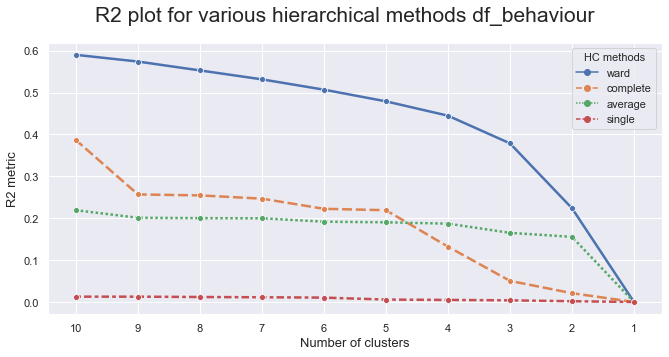

In [27]:
Hierarchical_Clustering_method(df_clean_scaled[full_preference])

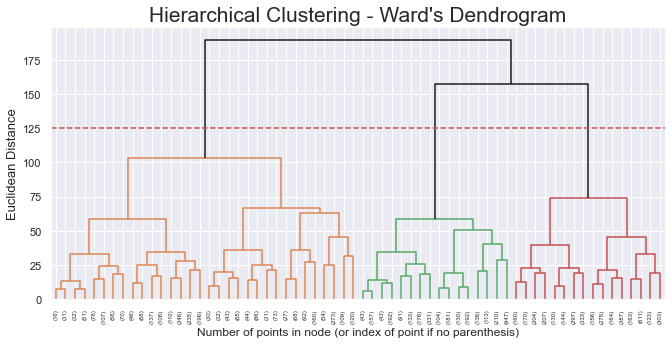

In [28]:
hc_dendrogram(df_clean_scaled[full_preference], "ward", "euclidean")

In [29]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)
hc_labels = hclust.fit_predict(df_clean_scaled[full_preference])
hc_labels

array([1, 2, 0, ..., 0, 0, 1])

In [30]:
df_hierarchical_behaviour_concat = pd.concat((df_clean[full_preference], pd.Series(hc_labels, name='labels')), axis=1)
cluster_means_HC_Behaviour = df_hierarchical_behaviour_concat.groupby('labels').mean().round(2)

cluster_means_HC_Behaviour

Perdeal  Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  \
labels                                                               
0         55.13   28.81     12.39  33.65    13.06    12.08   30.01   
1         35.34   73.08      2.49  19.54     2.51     2.33   11.96   
2          7.44   43.38      7.52  34.50     6.92     7.67    9.40   

        WebPurchase  
labels               
0             54.97  
1             48.65  
2             22.96

In [31]:
# show the size of the clusters
df_hierarchical_behaviour_concat["labels"].value_counts()

1    3827
2    3179
0    2994
Name: labels, dtype: int64

In [32]:
radar_grapher(cluster_means_HC_Behaviour)

#### KMeans

********************************************************************************
['Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase']
********************************************************************************


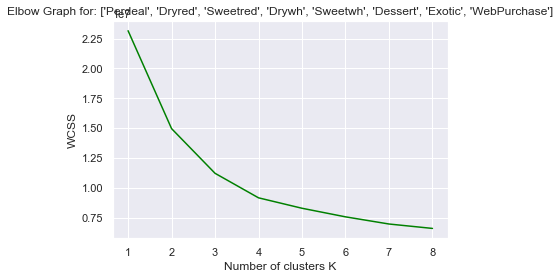

Best K:3
------------
K Chosen: 3
------------


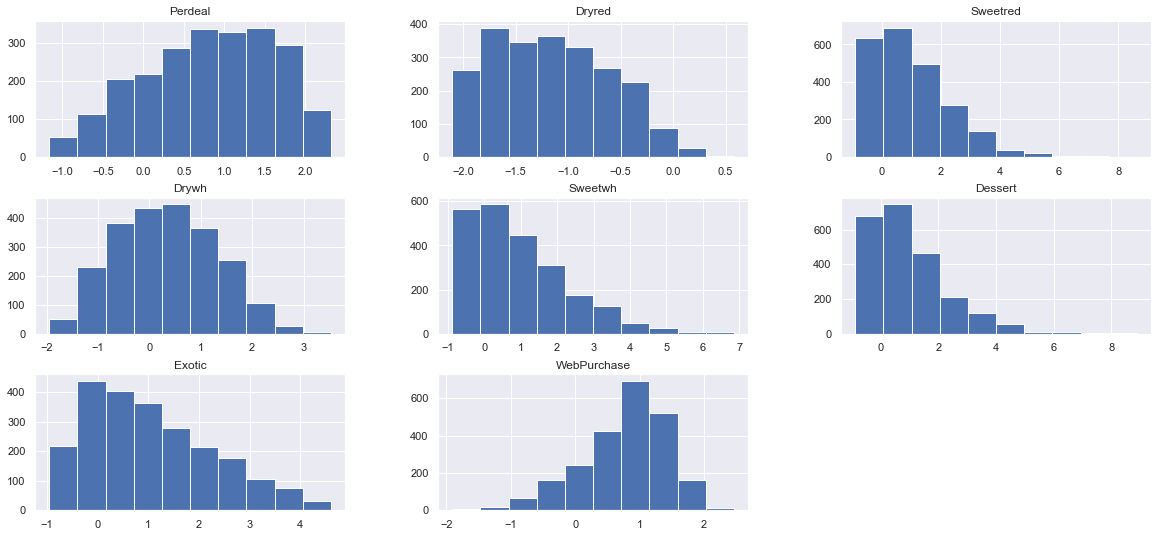

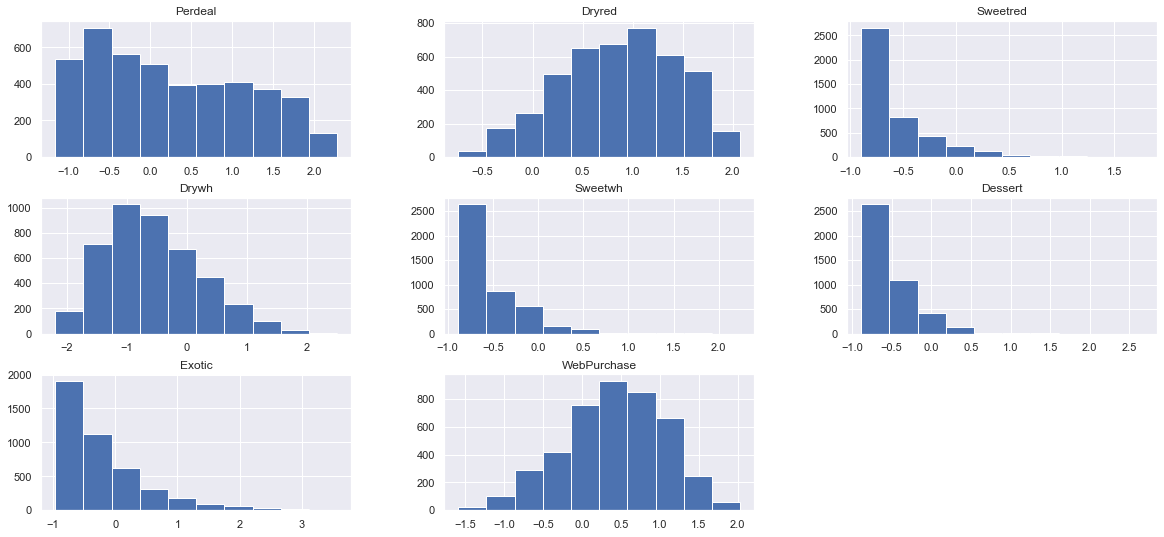

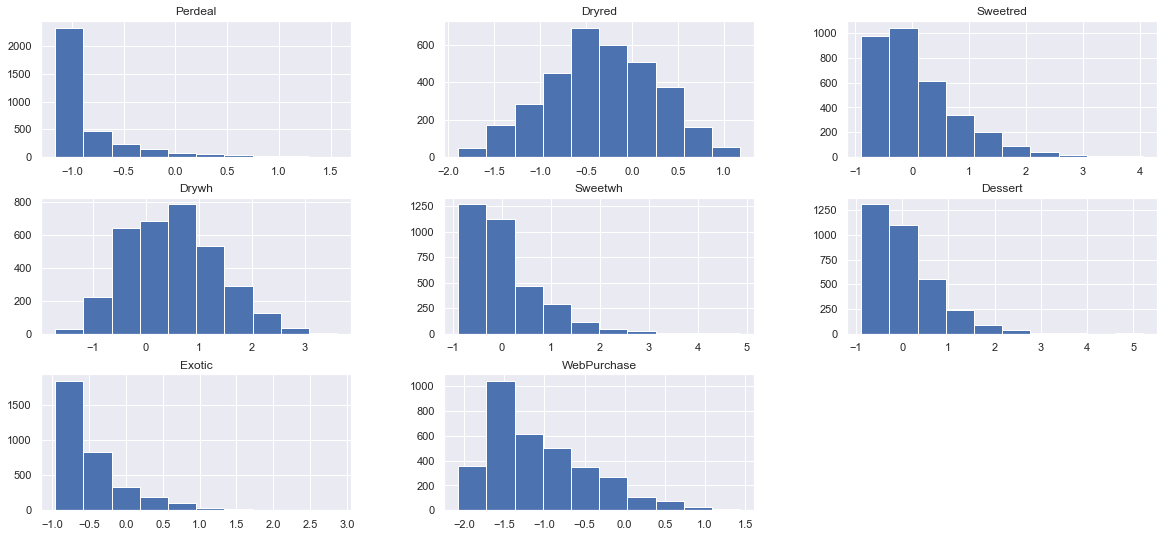

For n_clusters = 2, the average silhouette_score is : 0.34286337015638885
For n_clusters = 3, the average silhouette_score is : 0.29526871115159503
For n_clusters = 4, the average silhouette_score is : 0.27550275646238204
For n_clusters = 5, the average silhouette_score is : 0.23891124952479298
For n_clusters = 6, the average silhouette_score is : 0.2086226815894788


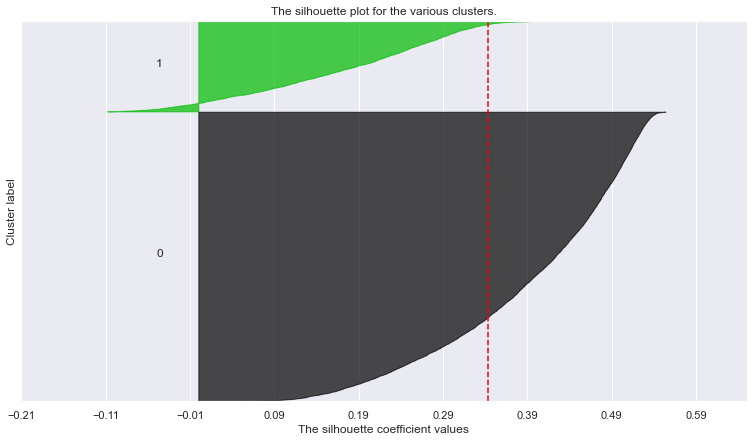

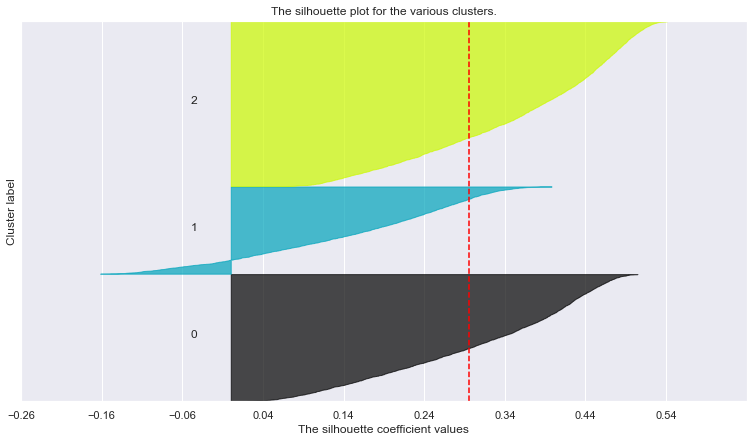

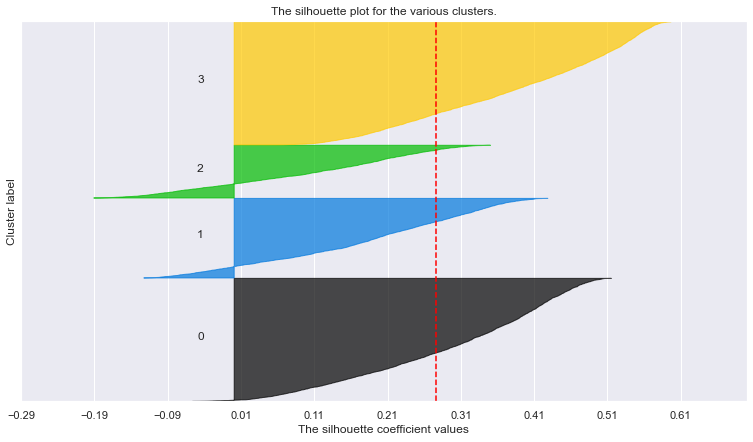

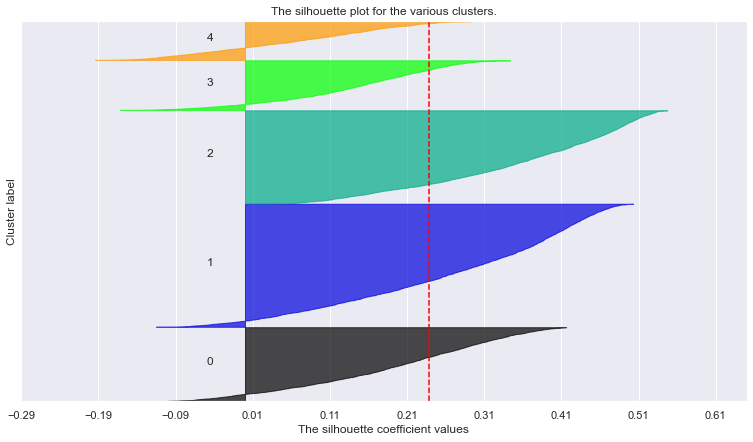

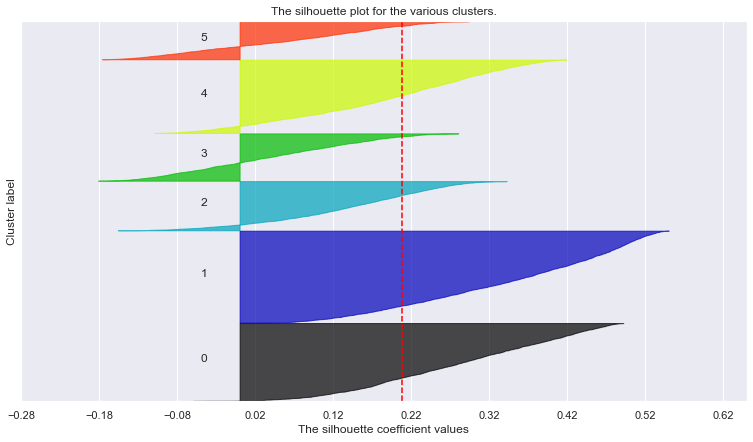

In [33]:
#Search range for k for both k_means and silhouette
range_n_clusters_k_means = np.arange(1,9,1)
range_n_clusters_sil = np.arange(2,10,1) #Note: Silhouette can't begin at 1

#Creating dfs for storage
cluster_dfs_grouped = {}
cluster_dfs = {}
unscaled_dfs_grouped = {}

#Initialising function

#KMeans and Silhouette Score for "full_preference" feature set
kmean_creator(variable_dataframe_creator(full_preference),0,"full_preference", poly = True)
unscaler("full_preference",full_preference)
silhouette_scorer(cluster_dfs["full_preference"])


In [34]:
unscaled_dfs_grouped["full_preference"].groupby('KCluster').mean().round(2)



Perdeal  Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  \
KCluster                                                               
0           54.71   23.40     14.67  32.69    14.74    14.49   34.87   
1           39.52   70.60      2.67  21.32     2.69     2.68   13.01   
2            7.79   42.66      7.52  35.02     7.48     7.31    8.54   

          WebPurchase  
KCluster               
0               56.37  
1               50.05  
2               22.77

In [35]:
# show the size of the clusters
cluster_dfs["full_preference"]["KCluster"].value_counts()

1    4351
2    3347
0    2302
Name: KCluster, dtype: int64

In [36]:
#radar_grapher(unscaled_dfs_grouped["full_preference"])

<div style=style="font-size:25px">
    Hierarchial Clustering for Customer Value
</div>


In [37]:
df.set_index("Custid", inplace=True)

In [38]:
new_df=df[['Age', 'Monetary', 'LTV', 'Income', 'WebPurchase', 'Dayswus', 'Freq']]

In [39]:
columns_cluster=['WebPurchase','Income', 'Recency', 'Monetary','LTV', 'Freq', 'Perdeal', 'Dayswus', 'Age' ]

In [40]:
features = df[columns_cluster]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = columns_cluster)
scaled_features.head()

WebPurchase    Income   Recency  Monetary       LTV      Freq   Perdeal  \
0    -0.344283  0.310352 -0.635588  0.314409  0.808095  0.448860 -0.910480   
1    -1.208204  1.274296 -0.420895  1.900016  1.130060  1.785772 -1.089728   
2     0.951598 -1.518332 -0.091700 -0.901842 -0.740079 -0.888052  1.993339   
3     0.897603 -0.295419 -0.234828 -0.904932 -0.736654 -1.055166  1.348046   
4     1.113583 -0.149056 -0.850281 -0.906478 -0.702402 -1.055166  0.093309   

    Dayswus       Age  
0 -1.210544  0.408803  
1  0.705765  1.564806  
2 -1.146338 -1.729803  
3  0.745276 -0.342599  
4 -0.301779 -0.053598

In [41]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(distance_threshold=6,linkage='ward', affinity='euclidean', n_clusters=None, compute_full_tree=True, compute_distances=True)
hc_labels = hclust.fit_predict(scaled_features)
hc_labels

array([ 0, 32, 77, ...,  3,  4, 87])

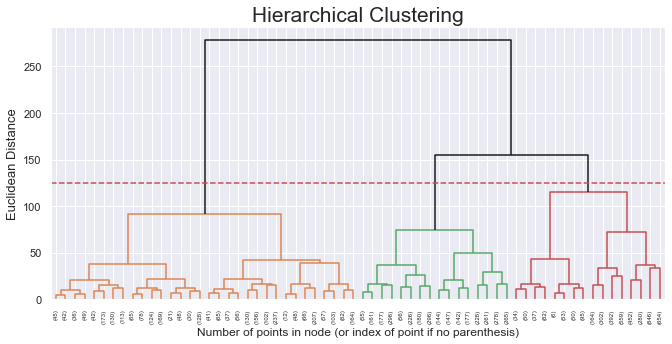

In [42]:

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 125
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [43]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)
hc_labels = hclust.fit_predict(scaled_features)
hc_labels

array([1, 1, 0, ..., 0, 2, 2])

In [44]:
pred = hc_labels
frame = pd.DataFrame(new_df)
frame['h_cluster'] = pred
frame.head(5)

Age  Monetary    LTV    Income  WebPurchase  Dayswus  Freq  h_cluster
Custid                                                                        
5325.0  55.0     826.0  445.0   78473.0         36.0    653.0  20.0          1
3956.0  75.0    1852.0  539.0  105087.0         20.0   1041.0  36.0          1
3681.0  18.0      39.0   -7.0   27984.0         60.0    666.0   4.0          0
2829.0  42.0      37.0   -6.0   61748.0         59.0   1049.0   2.0          0
8788.0  47.0      36.0    4.0   65789.0         63.0    837.0   2.0          2

In [45]:
avg_df = new_df.groupby(['h_cluster'], as_index=False).mean()

<AxesSubplot:xlabel='h_cluster', ylabel='Monetary'>

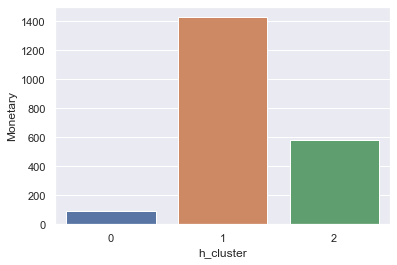

In [46]:
sns.barplot(x='h_cluster',y='Monetary',data=avg_df)

<AxesSubplot:xlabel='h_cluster', ylabel='Age'>

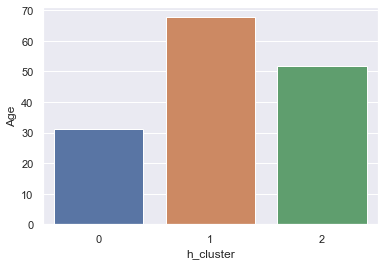

In [47]:
sns.barplot(x='h_cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='h_cluster', ylabel='LTV'>

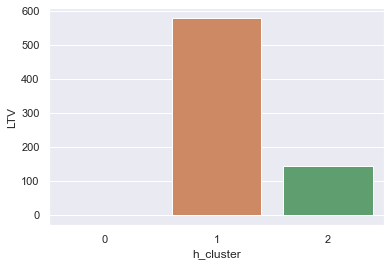

In [48]:
sns.barplot(x='h_cluster',y='LTV',data=avg_df)

<AxesSubplot:xlabel='h_cluster', ylabel='Income'>

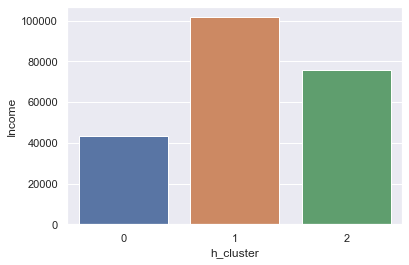

In [49]:
sns.barplot(x='h_cluster',y='Income',data=avg_df)

<AxesSubplot:xlabel='h_cluster', ylabel='WebPurchase'>

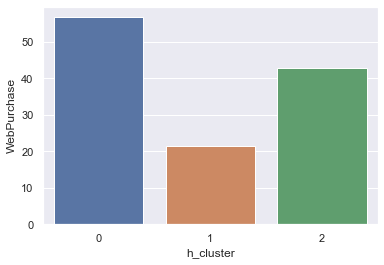

In [50]:
sns.barplot(x='h_cluster',y='WebPurchase',data=avg_df)

In [51]:
new_df.value_counts('h_cluster')

h_cluster
0    4056
2    3089
1    2856
dtype: int64

In [52]:
new_df.head(10)

Age  Monetary    LTV    Income  WebPurchase  Dayswus  Freq  h_cluster
Custid                                                                        
5325.0  55.0     826.0  445.0   78473.0         36.0    653.0  20.0          1
3956.0  75.0    1852.0  539.0  105087.0         20.0   1041.0  36.0          1
3681.0  18.0      39.0   -7.0   27984.0         60.0    666.0   4.0          0
2829.0  42.0      37.0   -6.0   61748.0         59.0   1049.0   2.0          0
8788.0  47.0      36.0    4.0   65789.0         63.0    837.0   2.0          2
4356.0  54.0     658.0  185.0   76751.0         36.0    916.0  17.0          1
7003.0  42.0      33.0   -5.0   51644.0         44.0    874.0   2.0          0
1815.0  70.0    1407.0  440.0   83942.0         13.0   1063.0  29.0          1
9139.0  26.0      21.0   -6.0   33186.0         66.0    853.0   2.0          0
6511.0  53.0     651.0  195.0   88538.0         39.0    881.0  17.0          1

# 5. Kmeans Clustering for Customer Value

In [53]:
X=scaled_features.copy()

For n_clusters = 2, the average silhouette_score is : 0.42349638927725225
For n_clusters = 3, the average silhouette_score is : 0.29784253729776655
For n_clusters = 4, the average silhouette_score is : 0.32539884173411276
For n_clusters = 5, the average silhouette_score is : 0.2650571468123155


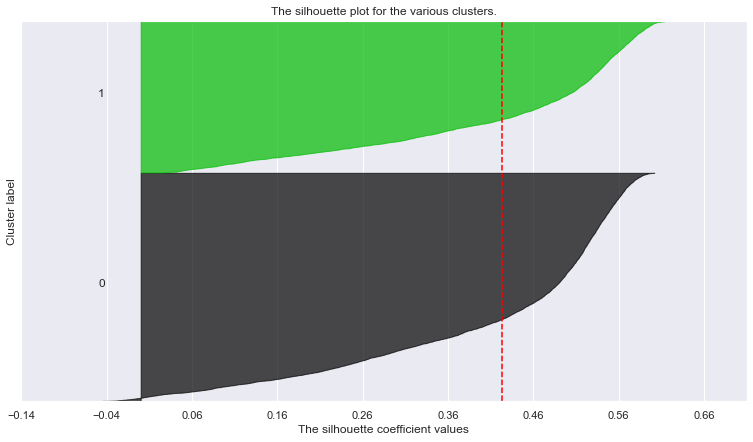

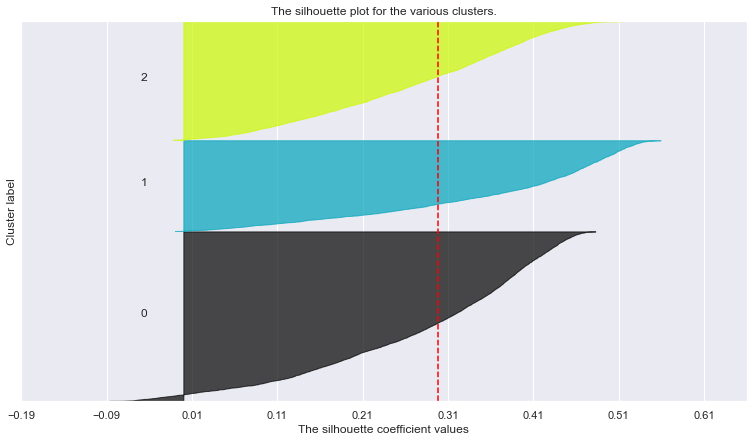

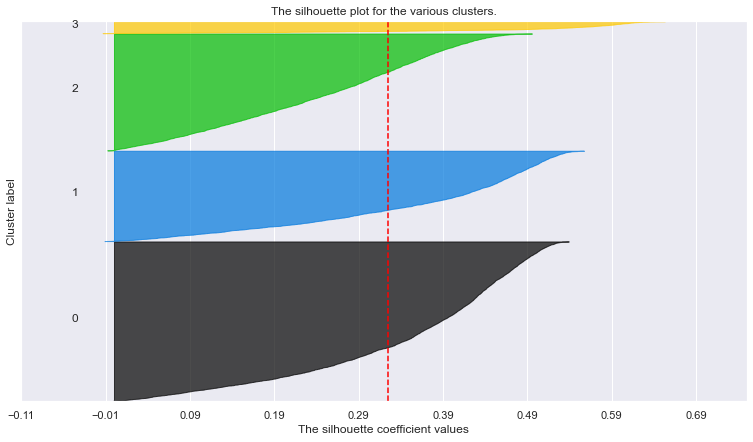

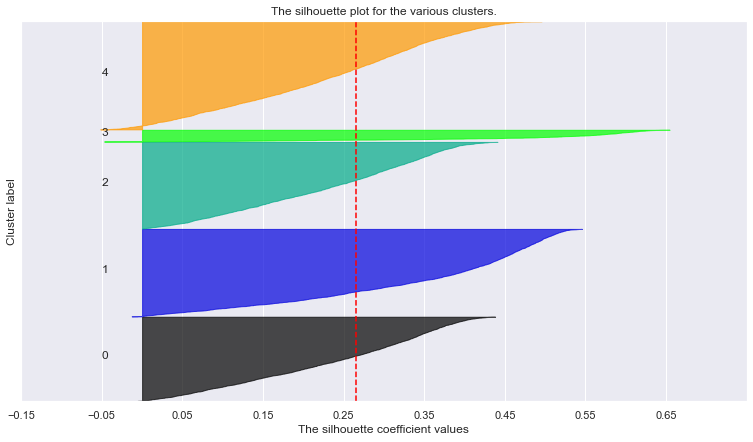

In [54]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
range_clusters = range(1, 6)
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(X) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

# PCA

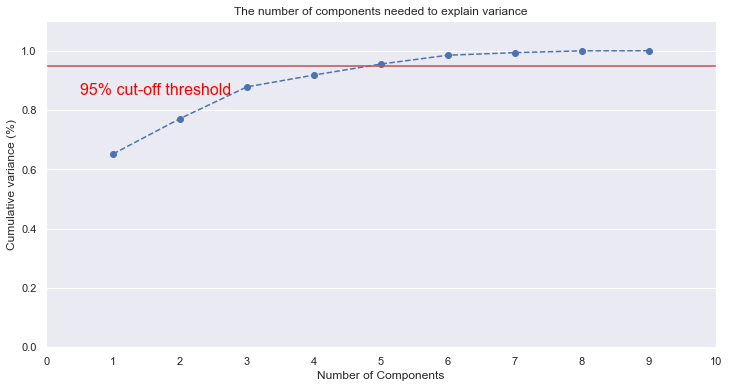

In [55]:
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [56]:
pca = PCA(n_components=5)
pca_scale = pca.fit_transform(X)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3','pc4','pc5'])
print(pca.explained_variance_ratio_)

[0.65201386 0.11912926 0.10711175 0.03973901 0.03713964]


In [57]:
kmeans_pca_scale = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.447228004788976


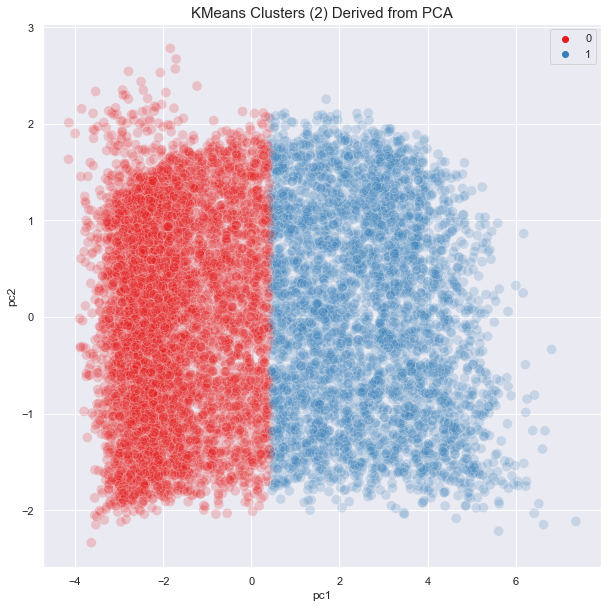

In [58]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (2) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

# T-SNE

In [59]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=1500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.009s...
[t-SNE] Computed neighbors for 10001 samples in 1.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.470767
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.017036
[t-SNE] KL

In [60]:
range_clusters = range(1, 6)
avg_silhouette = []
for nclus in range_clusters:
    if nclus == 1:
        continue
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(tsne_df_scale)
    silhouette_avg = silhouette_score(tsne_df_scale, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")


For n_clusters = 2, the average silhouette_score is : 0.495055615901947
For n_clusters = 3, the average silhouette_score is : 0.40603506565093994
For n_clusters = 4, the average silhouette_score is : 0.4109417796134949
For n_clusters = 5, the average silhouette_score is : 0.3929550051689148


In [61]:
kmeans_tsne_scale = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.495055615901947


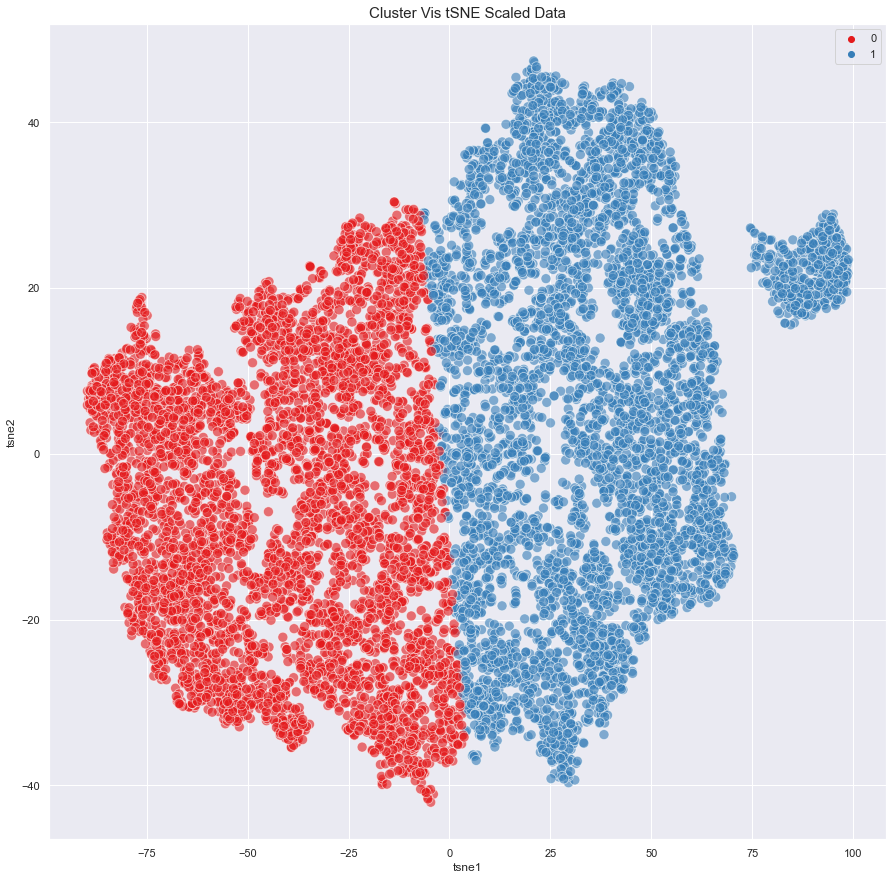

In [62]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [63]:
clusters_tsne_scale.head(3)

tsne1      tsne2  tsne_clusters
0 -30.384014 -24.235952              0
1 -68.485268   3.008568              0
2  66.174866  -8.814527              1

In [64]:
df_clustered_final = cluster_merger(unscaled_dfs_grouped["full_preference"],clusters_tsne_scale).set_index("Custid")
df_clustered_final.sample(5)

Dayswus   Age   Edu   Income  Freq  Recency  Monetary    LTV  Perdeal  \
Custid                                                                          
4585.0   1171.0  44.0  16.0  67014.0  16.0     49.0     588.0  -33.0     57.0   
9876.0    555.0  61.0  16.0  94687.0  16.0     10.0     599.0  165.0      5.0   
5995.0   1218.0  48.0  15.0  58114.0   5.0     26.0     118.0   -8.0     57.0   
1852.0    864.0  45.0  15.0  74600.0  15.0     40.0     547.0  153.0     17.0   
4135.0    908.0  41.0  19.0  60218.0   1.0    126.0      20.0    1.0     46.0   

        Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  WebPurchase  \
Custid                                                                   
4585.0    59.0       2.0   32.0      3.0      4.0     6.0         54.0   
9876.0    47.0       6.0   34.0     12.0      2.0    18.0         26.0   
5995.0    84.0       2.0   10.0      3.0      0.0    14.0         58.0   
1852.0    72.0       1.0   21.0      1.0      5.0    12.0         46.0   
4135.0    81.0       0.0   18.0      0.0      0.0    29.0         45.0   

        WebVisit  behaviour_cluster  engagement_cluster  
Custid                                                   
4585.0       8.0                1.0                   1  
9876.0       2.0                2.0                   0  
5995.0       8.0                1.0                   1  
1852.0       6.0                1.0                   0  
4135.0       5.0                1.0                   1

In [65]:
fig = px.scatter(df_clustered_final,x= "behaviour_cluster",y= "engagement_cluster",marginal_x="histogram", marginal_y="histogram", title = "Distribution of Final Clusters")
fig.show()

In [66]:
df_clustered_final_grouped = df_clustered_final.groupby(["behaviour_cluster","engagement_cluster"]).mean().drop("Custid", axis = 1)
df_clustered_final_grouped

KeyError: "['Custid'] not found in axis"

In [ ]:
df_clustered_final_grouped_scaled = pd.DataFrame(scaler.fit_transform(df_clustered_final_grouped), columns= df_clustered_final_grouped.columns)
df_clustered_final_grouped_scaled

In [ ]:
radar_grapher(df_clustered_final_grouped_scaled.drop(["WebVisit","Freq","Monetary"],axis = 1))

In [ ]:
#Counting how many customers per combined cluster

df_clustered_final_count = pd.DataFrame(df_clustered_final.groupby(["behaviour_cluster","engagement_cluster"]).count()["Custid"]).reset_index()
new_index  = [str((0,0)),str((0,1)),str((1,0)),str((1,1)),str((2,0)),str((2,1))]
df_clustered_final_count.index = new_index
df_clustered_final_count = df_clustered_final_count.drop(["behaviour_cluster","engagement_cluster"], axis = 1)
df_clustered_final_count

In [ ]:
fig = px.bar(df_clustered_final_count, title = "Number of Customers per Combined Cluster")
fig.show()